In [7]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

In [8]:
# load data
data = cdc.CoronaData()


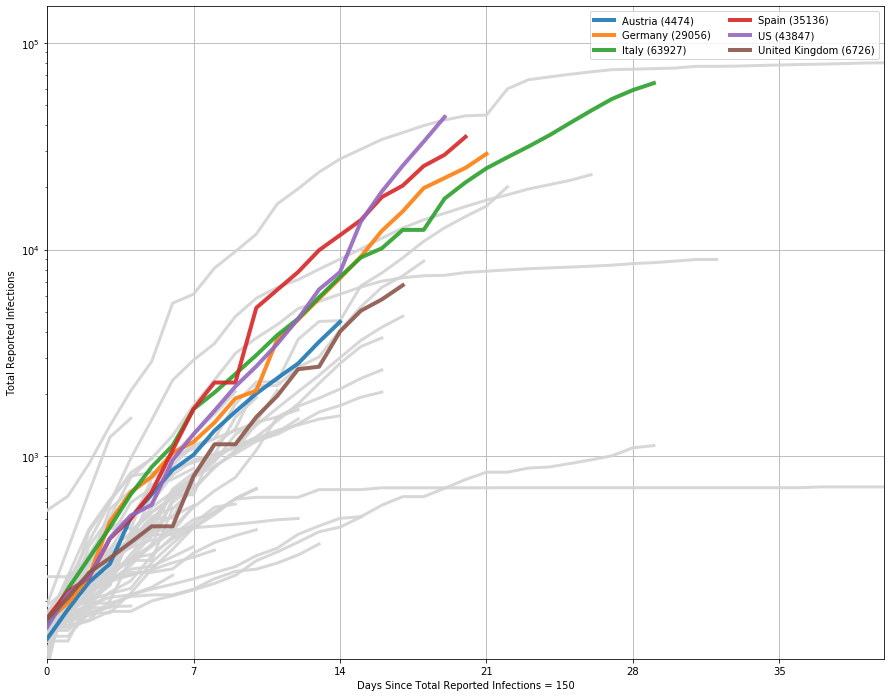

In [9]:
threshold  = 150

colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(data))
fig, ax          = plt.subplots()
scidx            = 0

specialcountries = ['Austria','Italy','Germany','Spain','US', 'United Kingdom']

for country,countrydata in data:
    totinf = np.nan_to_num(countrydata['Confirmed'])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(totinf[-1])
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

# exponential plots with doubling time in days
#for doublingtime in np.arange(2,6):
#    ax.plot(x,150 * np.power(2,x/doublingtime), lw = 10, zorder = 80, c = 'black',alpha = .4)
        
plt.legend(ncol = 2)
plt.xlim([0,40])
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.ylim([threshold*.7,1.5e5])
plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
#plt.title('Data downloaded: ' + datatime)
plt.yscale('log')
plt.grid()
plt.show()

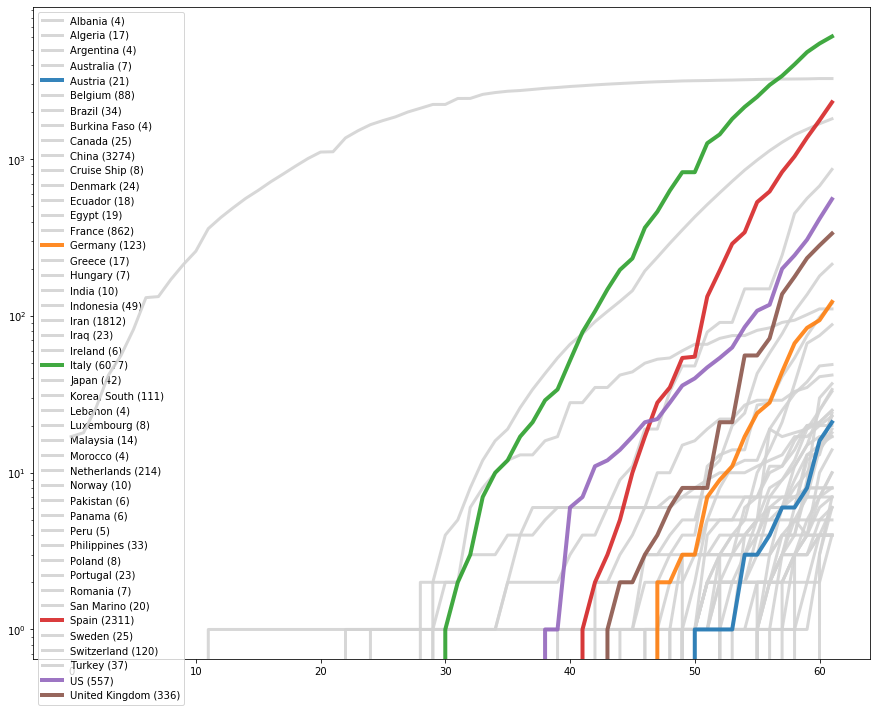

In [4]:
scidx = 0
lgnd = []
fig, ax          = plt.subplots()
dthreshold  = 3
for country,countrydata in data:
    deaths = np.nan_to_num(countrydata['Deaths'])
    if deaths[-1] > dthreshold:
        lgnd.append(country + ' ({:.0f})'.format(deaths[-1]))
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(deaths[-1])
        ax.plot(deaths, c = c, zorder = z, lw = lw, alpha = .9)

plt.legend(lgnd)
plt.yscale('log')
plt.show()